In [1]:
import pandas as pd
df_concat=pd.read_csv('df_concat.csv')

In [2]:
df_concat.shape

(249632, 66)

In [3]:
# 新增六个项目内容
# 合并完成内容在concat数据集当中
import pandas as pd
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

from config import *

# 2. the most top 30 words in newreview data
# the reviews are mainly from the 'comment' column.

reviews_details = df_concat[['id','name', 'host_id', 'host_name', 'date', 'reviewer_id', 'reviewer_name', 'comments']]

host_reviews = reviews_details.groupby(['host_id', 'host_name']).size().sort_values(ascending=False).to_frame(name = "number_of_reviews")
# you can show something by the code below.
# host_reviews.head()
# reviews_details.comments.head()
# reviews_details.comments.values[1]

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from config import *

In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kukudexinxin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
# and the basic pre processing code for comment. take out empty comments. 并对评论的各种格式进行修改，其中存在很多无意义的连接和我们并不希望进行统计的内容
reviews_details = reviews_details[reviews_details['comments'].notnull()]
#remove numbers
reviews_details['comments'] = reviews_details['comments'].str.replace('\d+', '')
#all to lowercase
reviews_details['comments'] = reviews_details['comments'].str.lower()
#remove windows new line
reviews_details['comments'] = reviews_details['comments'].str.replace('\r\n', "")
#remove stopwords (from nltk library)
stop_english = stopwords.words("english")
reviews_details['comments'] = reviews_details['comments'].apply(lambda x: " ".join([i for i in x.split()
                                                      if i not in (stop_english)]))
# remove punctuation
reviews_details['comments'] = reviews_details['comments'].str.replace('[^\w\s]'," ")
# replace x spaces by one space
reviews_details['comments'] = reviews_details['comments'].str.replace('\s+', ' ')

print(reviews_details.comments.values[2])

<ipython-input-6-bd8bff545eb6>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews_details['comments'] = reviews_details['comments'].str.replace('\d+', '')
<ipython-input-6-bd8bff545eb6>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews_details['comments'] = reviews_details['comments'].str.replace('[^\w\s]'," ")
<ipython-input-6-bd8bff545eb6>:16: FutureWarning: The default value of regex will change from True to False in a future version.
  reviews_details['comments'] = reviews_details['comments'].str.replace('\s+', ' ')


friendly generous host 


In [7]:
import re

In [8]:
def is_english(row):
    return bool(re.match(r'^[a-zA-Z\s]+$', row))


reviews_details['is_english'] = reviews_details.apply(lambda row: is_english(row['comments']), axis=1)
reviews_details = reviews_details.loc[reviews_details['is_english'] == True]

In [9]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
scorer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kukudexinxin/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [10]:
#calculate sentiments of reviews
#因为有一些列非英文，我们要找到这些行,然后将它删去
def calculate_sentiment(comment):
    return(scorer.polarity_scores(comment)['compound'])

reviews_details.loc[:,'sentiment'] = reviews_details['comments'].apply(calculate_sentiment)
reviews_details[['comments','sentiment']].head()

,comments,sentiment
0,lovely house nice host nick completely comfort...,0.9617
1,nice clean cozy apartment host friendly right ...,0.8555
2,friendly generous host,0.7579
4,lovely weekend stay girlfriend recently room c...,0.9371
5,nick fantastic host place beautiful clean love...,0.9337


In [11]:
# create positive comments
df_positive = reviews_details[reviews_details['sentiment']>0]
df_positive[['comments','sentiment']].head()

,comments,sentiment
0,lovely house nice host nick completely comfort...,0.9617
1,nice clean cozy apartment host friendly right ...,0.8555
2,friendly generous host,0.7579
4,lovely weekend stay girlfriend recently room c...,0.9371
5,nick fantastic host place beautiful clean love...,0.9337


In [12]:
# create negative comments
df_negative = reviews_details[reviews_details['sentiment']<0]
df_negative[['comments','sentiment']].head()

,comments,sentiment
274,stayed room ticked boxes clean spacious,-0.0258
347,tired solve privately get questions answered a...,-0.6908
443,place nice however coming back customer servic...,-0.0772
481,thankyou welcoming stay especially covid times...,-0.1189
661,great place disappointed host s communication ...,-0.7650


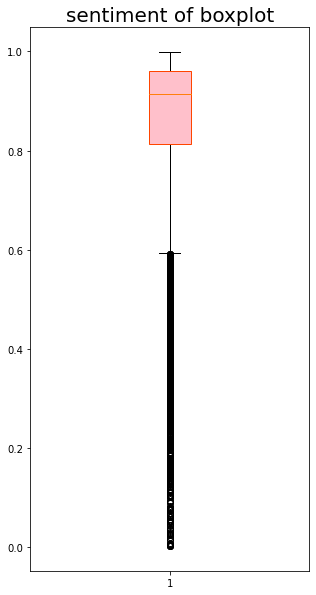

In [13]:
# box plots of positive reviews sentiment

box = df_positive['sentiment']

plt.figure(figsize=(5,10))#设置画布的尺寸
plt.title('sentiment of boxplot',fontsize=20)#标题，并设定字号大小

#boxprops：color箱体边框色，facecolor箱体填充色；
plt.boxplot([box],patch_artist = True, boxprops = {'color':'orangered','facecolor':'pink'})

plt.show()#显示图像

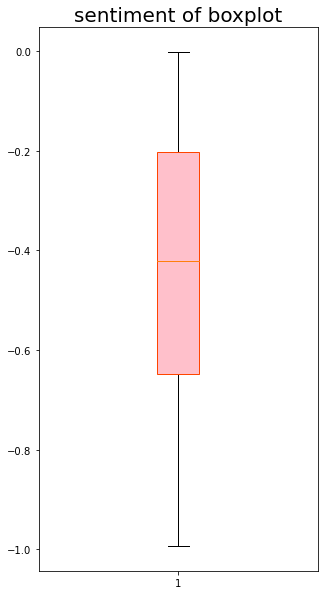

In [14]:
# box plots of negative reviews sentiment

box = df_negative['sentiment']

plt.figure(figsize=(5,10))#设置画布的尺寸
plt.title('sentiment of boxplot',fontsize=20)#标题，并设定字号大小

#boxprops：color箱体边框色，facecolor箱体填充色；
plt.boxplot([box],patch_artist = True, boxprops = {'color':'orangered','facecolor':'pink'})

plt.show()#显示图像

<AxesSubplot:ylabel='sentiment'>

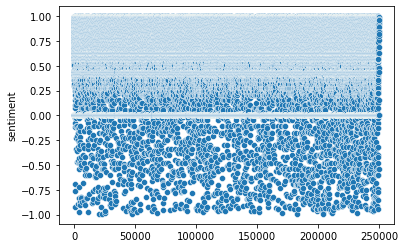

In [15]:
#draw scatter plot of all cleansed reviews
import seaborn as sns
sns.scatterplot(data=reviews_details,x=reviews_details['sentiment'].index,y=reviews_details['sentiment'])


<AxesSubplot:ylabel='sentiment'>

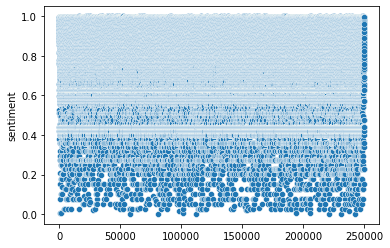

In [16]:
#draw scatter plot of positive reviews
import seaborn as sns
sns.scatterplot(data=df_positive,x=df_positive['sentiment'].index,y=df_positive['sentiment'])


<AxesSubplot:ylabel='sentiment'>

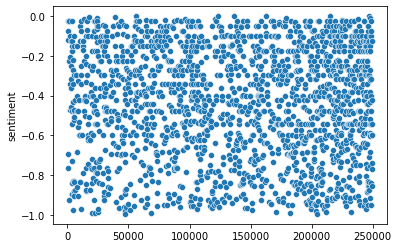

In [17]:
#draw scatter plot of negative reviews
import seaborn as sns
sns.scatterplot(data=df_negative,x=df_negative['sentiment'].index,y=df_negative['sentiment'])

<AxesSubplot:ylabel='sentiment'>

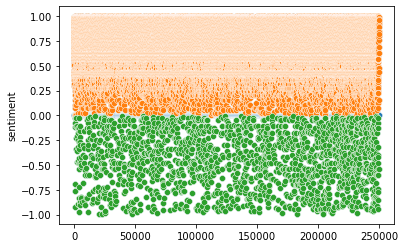

In [18]:
#draw scatter plot of all cleansed reviews
import seaborn as sns
sns.scatterplot(data=reviews_details,x=reviews_details['sentiment'].index,y=reviews_details['sentiment'])

#draw scatter plot of positive reviews
import seaborn as sns
sns.scatterplot(data=df_positive,x=df_positive['sentiment'].index,y=df_positive['sentiment'])
#draw scatter plot of negative reviews
import seaborn as sns
sns.scatterplot(data=df_negative,x=df_negative['sentiment'].index,y=df_negative['sentiment'])

In [19]:

# find the most used words using the CountVectorizer() function of sklearn.
texts = df_positive.comments.tolist()

vec = CountVectorizer().fit(texts)
bag_of_words = vec.transform(texts)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

cvec_df_positive = pd.DataFrame.from_records(words_freq, columns= ['words', 'counts']).sort_values(by="counts", ascending=False)



In [20]:

# find the most used words using the CountVectorizer() function of sklearn.
texts = df_negative.comments.tolist()

vec = CountVectorizer().fit(texts)
bag_of_words = vec.transform(texts)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

cvec_df_negative = pd.DataFrame.from_records(words_freq, columns= ['words', 'counts']).sort_values(by="counts", ascending=False)



In [42]:
cvec_df_positive.head(100)

,words,counts
59,great,142537
10,stay,111835
55,place,101640
60,location,95538
28,apartment,88316
26,clean,60729
51,would,48555
3,host,47369
53,melbourne,44566
45,everything,43701


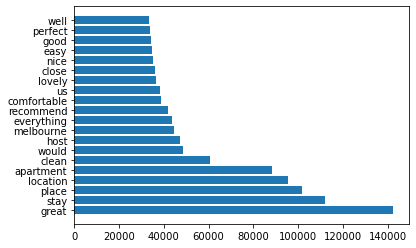

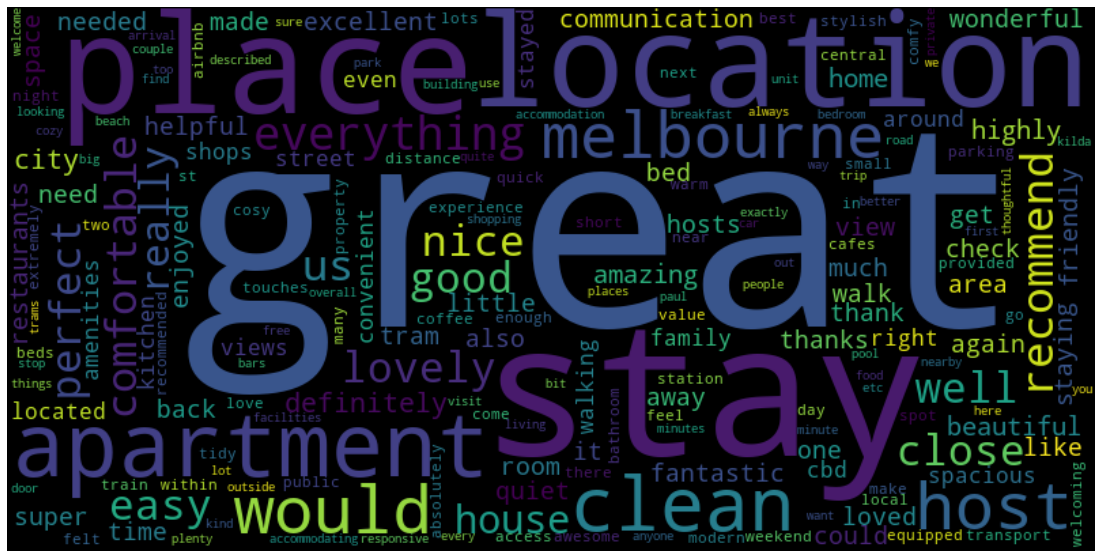

In [21]:
## positive reviews
# 柱状图展示
# cvec_df.head(10).plot.barh(figsize=(15, 3), width=0.4)
plt.barh(cvec_df_positive.head(20).words.to_list(),
         cvec_df_positive.head(20).counts.to_list()
         )
plt.show()

# 词云展示
cvec_dict = dict(zip(cvec_df_positive.words, cvec_df_positive.counts))

wordcloud = WordCloud(width=800, height=400)
wordcloud.generate_from_frequencies(frequencies=cvec_dict)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [29]:
!pip install jieba

     |████████████████████████████████| 19.2 MB 7.9 MB/s eta 0:00:01
  Created wheel for jieba: filename=jieba-0.42.1-py3-none-any.whl size=19314477 sha256=bad56ac958a5976ddb417ba4a7bbaa277dd20e5d74ab47a11f33ff3fc042a4aa
  Stored in directory: /Users/kukudexinxin/Library/Caches/pip/wheels/ca/38/d8/dfdfe73bec1d12026b30cb7ce8da650f3f0ea2cf155ea018ae
Successfully built jieba


In [35]:
df_positive.to_csv('airbnb_positive'.txt)

AttributeError: 'str' object has no attribute 'txt'

In [32]:
import jieba
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def trans_ch(txt):
  words = jieba.lcut(txt)
  newtxt = ''.join(words)
  return newtxt



txt = df_positive['comments']
mask = np.array(Image.open("airbnb_wordcloud1.png"))              
wordcloud = WordCloud(background_color="white",\
                      width = 800,\
                      height = 600,\
                      max_words = 200,\
                      max_font_size = 80,\
                      mask = mask,\
                      contour_width = 4,\
                      contour_color = 'steelblue',\
                        font_path =  "msyh.ttf"
                      ).generate(txt)
wordcloud.to_file('positive_airbnb_wordcloud.png')



KeyError: 'comments'

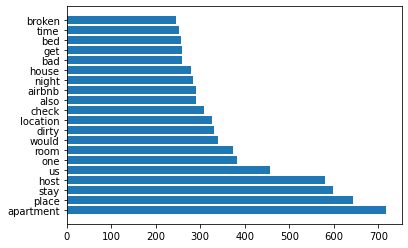

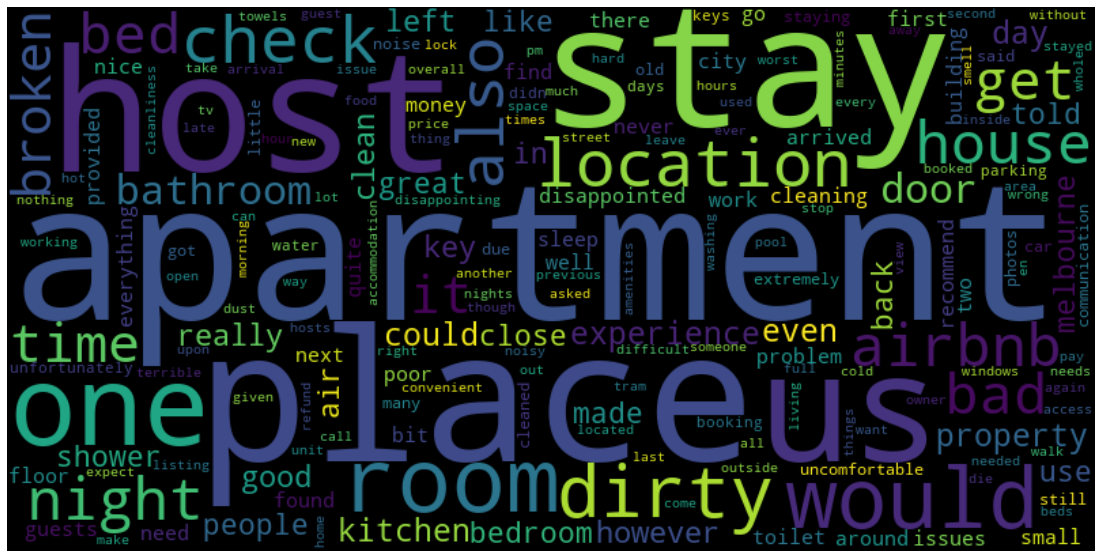

In [41]:
## negative reviews
# 柱状图展示
# cvec_df.head(10).plot.barh(figsize=(15, 3), width=0.4)
plt.barh(cvec_df_negative.head(20).words.to_list(),
         cvec_df_negative.head(20).counts.to_list()
         )
plt.show()

# 词云展示
cvec_dict = dict(zip(cvec_df_negative.words, cvec_df_negative.counts))

wordcloud = WordCloud(width=800, height=400)
wordcloud.generate_from_frequencies(frequencies=cvec_dict)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [39]:
cvec_df_negative.head(100)

,words,counts
59,great,142537
10,stay,111835
55,place,101640
60,location,95538
28,apartment,88316
26,clean,60729
51,would,48555
3,host,47369
53,melbourne,44566
45,everything,43701


In [23]:
# Statistics
import pandas as pd
import numpy as np
import math as mt

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [24]:
#drop rows that 'listing_id' doesn't exist in the 'id' of 'listings' and create a new dataset'concat'
# merge dataset 'listings' and 'reviews' with the same 'id'

df_positive = pd.merge(df_concat,df_positive,how="inner",on='id')

In [25]:
df_positive.head()

,Unnamed: 0,id,listing_url,scrape_id,name_x,description,neighborhood_overview,host_id_x,host_name_x,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_$,profit_per_month,date_x,reviewer_id_x,reviewer_name_x,comments_x,name_y,host_id_y,host_name_y,date_y,reviewer_id_y,reviewer_name_y,comments_y,is_english,sentiment
0,0,19751625,https://www.airbnb.com/rooms/19751625,20200820034003,Cosy Apt with luxury Tempur bed on Lygon St,This charming apartment located on Lygon St in...,"Located on Lygon St in Carlton, you are 400m a...",13801169,Nick,2014-04-02,"Carlton, Victoria, Australia",I promise I won't be your stereotypical vegeta...,100,1.0,1,3.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",1,1,Melbourne,-37.79345,144.96682,Private room in apartment,Private room,2,1.5 shared baths,1.0,1.0,"[""Coffee maker"", ""Stove"", ""TV"", ""Free parking ...","$7,500.00",2,90,2,4,90,90,2.1,90.0,30,60,90,91,114,22,0,2017-10-27,2020-02-05,97.0,10.0,9.0,10.0,10.0,10.0,10.0,0,3,0,3,0,3.32,7500.0,256.701031,2017-10-27,155379231,Dat,"That is the lovely house with the nice host, N...",Cosy Apt with luxury Tempur bed on Lygon St,13801169,Nick,2017-10-27,155379231,Dat,lovely house nice host nick completely comfort...,True,0.9617
1,0,19751625,https://www.airbnb.com/rooms/19751625,20200820034003,Cosy Apt with luxury Tempur bed on Lygon St,This charming apartment located on Lygon St in...,"Located on Lygon St in Carlton, you are 400m a...",13801169,Nick,2014-04-02,"Carlton, Victoria, Australia",I promise I won't be your stereotypical vegeta...,100,1.0,1,3.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",1,1,Melbourne,-37.79345,144.96682,Private room in apartment,Private room,2,1.5 shared baths,1.0,1.0,"[""Coffee maker"", ""Stove"", ""TV"", ""Free parking ...","$7,500.00",2,90,2,4,90,90,2.1,90.0,30,60,90,91,114,22,0,2017-10-27,2020-02-05,97.0,10.0,9.0,10.0,10.0,10.0,10.0,0,3,0,3,0,3.32,7500.0,256.701031,2017-10-27,155379231,Dat,"That is the lovely house with the nice host, N...",Cosy Apt with luxury Tempur bed on Lygon St,13801169,Nick,2017-10-30,155868665,Tom,nice clean cozy apartment host friendly right ...,True,0.8555
2,0,19751625,https://www.airbnb.com/rooms/19751625,20200820034003,Cosy Apt with luxury Tempur bed on Lygon St,This charming apartment located on Lygon St in...,"Located on Lygon St in Carlton, you are 400m a...",13801169,Nick,2014-04-02,"Carlton, Victoria, Australia",I promise I won't be your stereotypical vegeta...,100,1.0,1,3.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",1,1,Melbourne,-37.79345,144.96682,Private room in apartment,Private room,2,1.5 shared baths,1.0,1.0,"[""Coffee maker"", ""Stove"", ""TV"", ""Free parking ...","$7,500.00",2,90,2,4,90,90,2.1,90.0,30,60,90,91,114,22,0,2017-10-27,2020-02-05,97.0,10.0,9.0,10.0,10.0,10.0,10.0,0,3,0,3,0,3.32,7500.0,256.701031,2017-10-27,155379231,Dat,"That is the lovely house with the nice host, N...",Cosy Apt with luxury Tempur bed on Lygon St,13801169,Nick,2017-11-07,106028610,Dongchen,friendly generous host,True,0.7579
3,0,19751625,https://www.airbnb.com/